# Generate plots for Diffusion-Limited Aggregation (DLA) tree with optional branch disconnections.

In [2]:
from tree_data_utils import make_sim_data
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import phate
import scprep
from dm import DiffusionMap

In [3]:
# define paths
DATA_PATH = "/home/mila/s/shuang.ni/scratch/phate_genetics/data/HGDP+1KGP/V4"
SAVE_PATH = "/home/mila/s/shuang.ni/scratch/phate_genetics/results/HGDP+1KGP"
Figure_PATH = SAVE_PATH + "/figures"

In [4]:
n_branch=8
branch_lengths=[50,300,300,300,300,300,300,50]
disconnect_branches=[1,3,7]
gap_multiplier=5
sampling_density_factors=None
sim_data, sim_data_gt, sim_label = make_sim_data(n_dim=200,
                                        n_branch=n_branch, 
                                        branch_lengths=branch_lengths, 
                                        disconnect_branches=disconnect_branches, 
                                        gap_multiplier=gap_multiplier,
                                        sampling_density_factors=sampling_density_factors)

In [5]:
# get ground truth (always set large t here)
phate_operator_gt = phate.PHATE(random_state=42, knn=100, t=15, decay=40, n_landmark=None, verbose=0, gamma=1)
phate_emb_gt = phate_operator_gt.fit_transform(sim_data_gt)

<Axes: title={'center': 'PHATE ground truth'}, xlabel=' ', ylabel=' '>

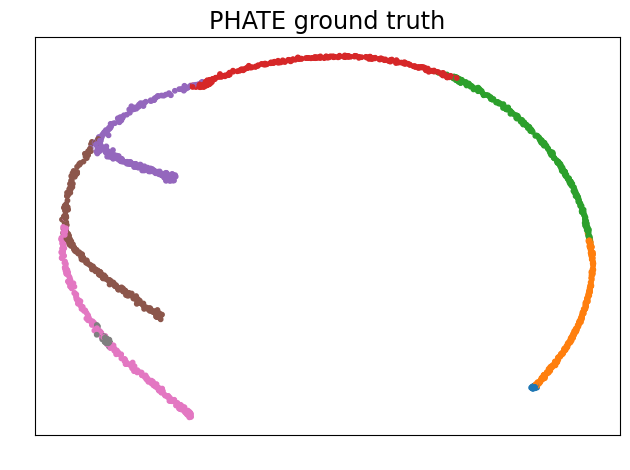

In [6]:
scprep.plot.scatter2d(phate_emb_gt, s=10, 
                      cmap='tab10', c=sim_label,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='PHATE ground truth', fontsize=10)

# fit on other methods

In [67]:
# fit t-SNE
tsne_obj = TSNE(n_components=2, init="pca")
tsne_emb = tsne_obj.fit_transform(sim_data)

# PCA embeddings
pca_obj = PCA(n_components=2)
pca_emb = pca_obj.fit_transform(sim_data)

# UMAP embeddings
umap_obj = UMAP(n_components=2)
umap_emb = umap_obj.fit_transform(sim_data)

# diffusion map embeddings
dm_obj = DiffusionMap(n_components=2, knn=120, t=10)
dm_obj.fit(sim_data)
dm_emb = dm_obj.transform(sim_data)

/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/mila/s/shuang.ni/manifold_genetics/.venv/lib/python3.9/site-packages/graphtools/graphs.py:116: UserWarning: Cannot set knn_max (100) to be less than knn (120). Setting knn_max=120
  warnings.warn(


## plot all methods

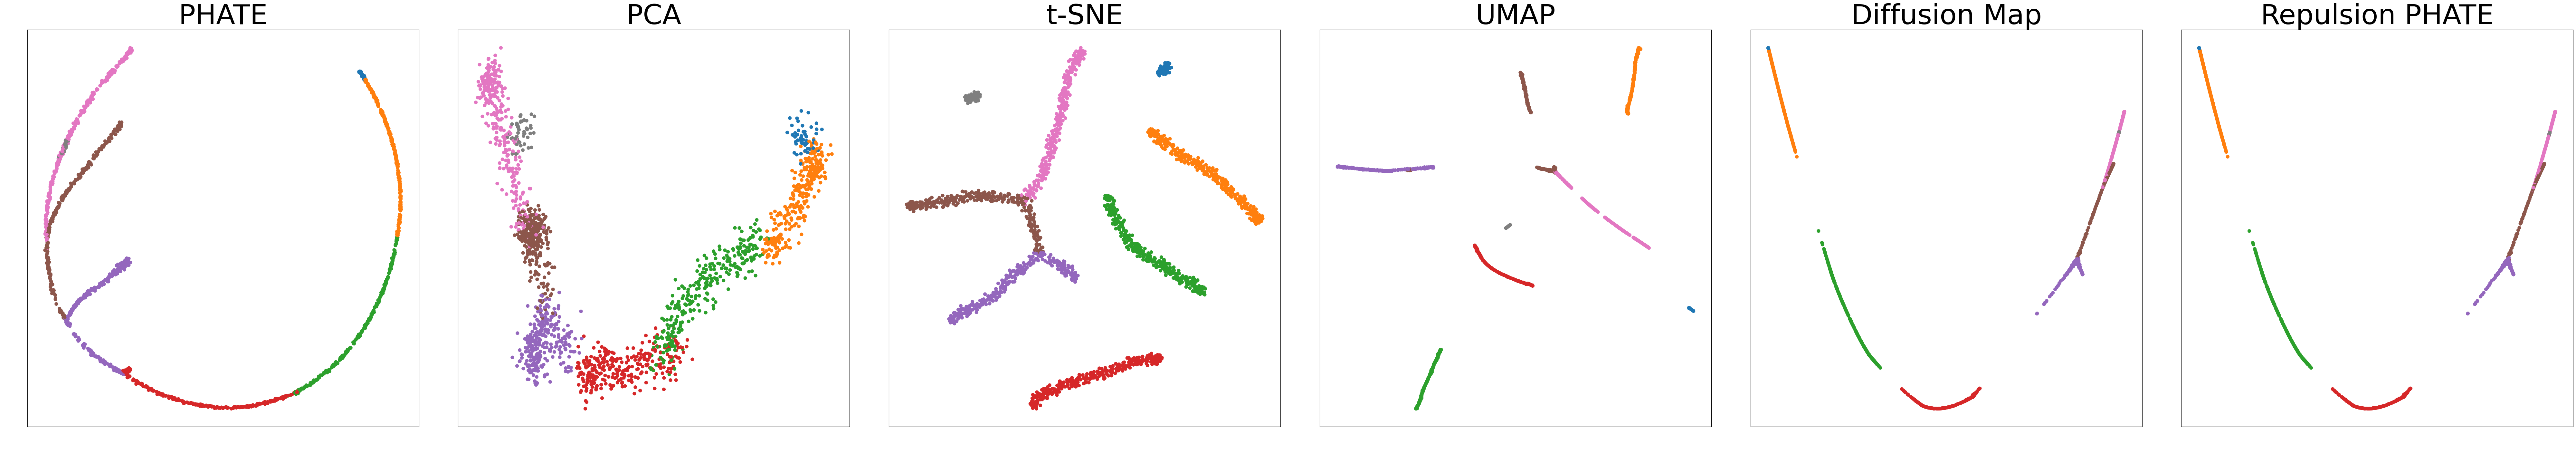

In [68]:
import matplotlib.patches as mpatches
n_methods = 6
fig, axes = plt.subplots(1,n_methods, figsize=(17*n_methods, 16), gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 1], 'wspace': 0.1})

# PHATE
scprep.plot.scatter2d(phate_emb_gt, s=50, ax=axes[0],
                      cmap='tab10', c=sim_label,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None,title='PHATE', fontsize=36)

# PCA
scprep.plot.scatter2d(pca_emb, s=50, ax=axes[1],
                      cmap='tab10', c=sim_label,
                      ticks =False, legend=False, xlabel=' ', ylabel=' ',
                      label_prefix=None,title='PCA', fontsize=36)

# t-SNE
scprep.plot.scatter2d(tsne_emb, s=50, ax=axes[2],
                      cmap='tab10', c=sim_label,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='t-SNE', fontsize=36)

# UMAP
scprep.plot.scatter2d(umap_emb, s=50, ax=axes[3],
                      cmap='tab10', c=sim_label,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='UMAP', fontsize=36)

# diffusion map
scprep.plot.scatter2d(dm_emb, s=50, ax=axes[4],
                      cmap='tab10', c=sim_label,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='Diffusion Map', fontsize=36)

# Repulsion PHATE
scprep.plot.scatter2d(dm_emb, s=50, ax=axes[5],
                      cmap='tab10', c=sim_label,
                      ticks =False, legend=False,xlabel=' ', ylabel=' ',
                      label_prefix=None, title='Repulsion PHATE', fontsize=36)

plt.savefig(Figure_PATH+'/tree_6methods.png', format='png', bbox_inches='tight', dpi=300)
plt.savefig(Figure_PATH+'/tree_6methods.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

# sweep on knn

In [13]:
Ks=[5, 25, 50, 100, 200, 300, 500, 1000]
t = 15
gamma = 1
phate_embs_k = []
for i, K in enumerate(Ks):
    phate_operator = phate.PHATE(random_state=42, knn=K, t=t, n_landmark=None, verbose=0, gamma=gamma)
    phate_emb = phate_operator.fit_transform(sim_data)
    phate_embs_k.append(phate_emb)



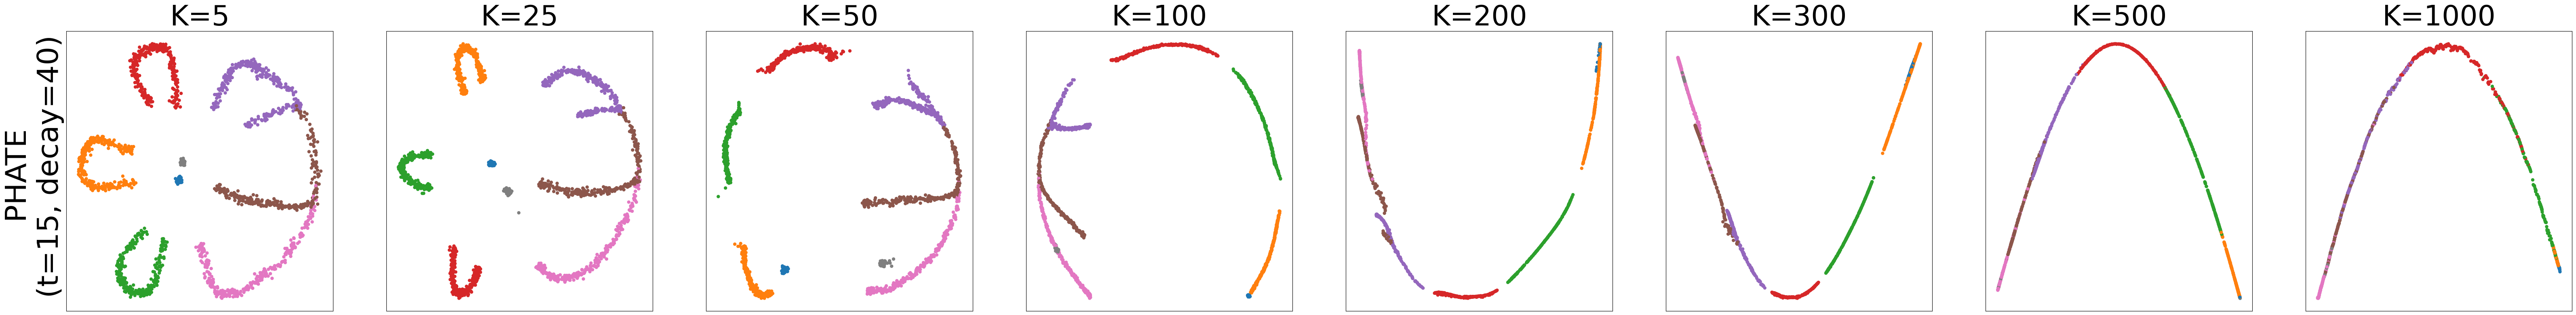

In [14]:
fig, ax = plt.subplots(ncols=len(Ks), nrows=1, figsize=(10*len(Ks), 9))

# Plot the embeddings for each method and subset size
for i, K in enumerate(Ks):   
    if i == 0:
        scprep.plot.scatter2d(phate_embs_k[i], s=25, ax=ax[i], c=sim_label, cmap='tab10', 
                              xticks=False, yticks=False, legend=False, ylabel=f'PHATE \n (t={t}, decay=40)', fontsize=36)
    else:
        scprep.plot.scatter2d(phate_embs_k[i], s=25, ax=ax[i], c=sim_label, cmap='tab10', 
                              xticks=False, yticks=False, legend=False, fontsize=36)

# Add labels for each row
for i, K in enumerate(Ks):
    ax[i].set_title('K={}'.format(K), fontsize=50) 

plt.savefig(Figure_PATH+'/tree_phate_k.png', format='png', bbox_inches='tight', dpi=300)

# sweep on t

In [11]:
Ts=[3, 5, 10, 15, 25, 40, 80, 150]
K = 100
gamma = 1
phate_embs_t = []
for i, t in enumerate(Ts):
    phate_operator = phate.PHATE(random_state=42, knn=K, t=t, n_landmark=None, verbose=0, gamma=gamma)
    phate_emb = phate_operator.fit_transform(sim_data)
    phate_embs_t.append(phate_emb)

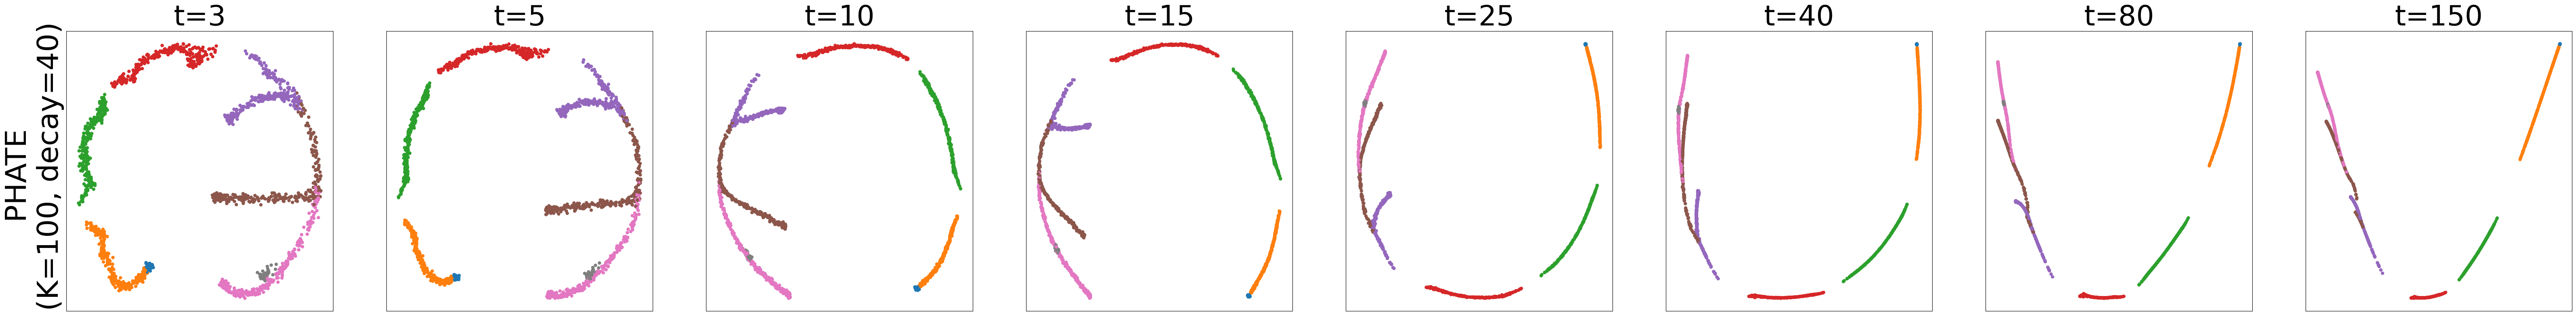

In [12]:
fig, ax = plt.subplots(ncols=len(Ts), nrows=1, figsize=(10*len(Ts), 9))

# Plot the embeddings for each method and subset size
for i, t in enumerate(Ts):   
    if i == 0:
        scprep.plot.scatter2d(phate_embs_t[i], s=25, ax=ax[i], c=sim_label, cmap='tab10', 
                              xticks=False, yticks=False, legend=False, ylabel=f'PHATE \n (K={K}, decay=40)', fontsize=36)
    else:
        scprep.plot.scatter2d(phate_embs_t[i], s=25, ax=ax[i], c=sim_label, cmap='tab10', 
                              xticks=False, yticks=False, legend=False, fontsize=36)

# Add labels for each row
for i, t in enumerate(Ts):
    ax[i].set_title('t={}'.format(t), fontsize=50) 

plt.savefig(Figure_PATH+'/tree_phate_t.png', format='png', bbox_inches='tight', dpi=300)

## sweep on decay

In [ ]:
Ds=[3,5,10, 15, 25, 40, 80, 150]
K = 100
t = 15
phate_embs_d = []
gamma = 1
for i, decay in enumerate(Ds):
    phate_operator = phate.PHATE(random_state=42, knn=K, t=t, decay=decay, n_landmark=None, verbose=0, gamma=gamma)
    phate_emb = phate_operator.fit_transform(sim_data)
    phate_embs_d.append(phate_emb)

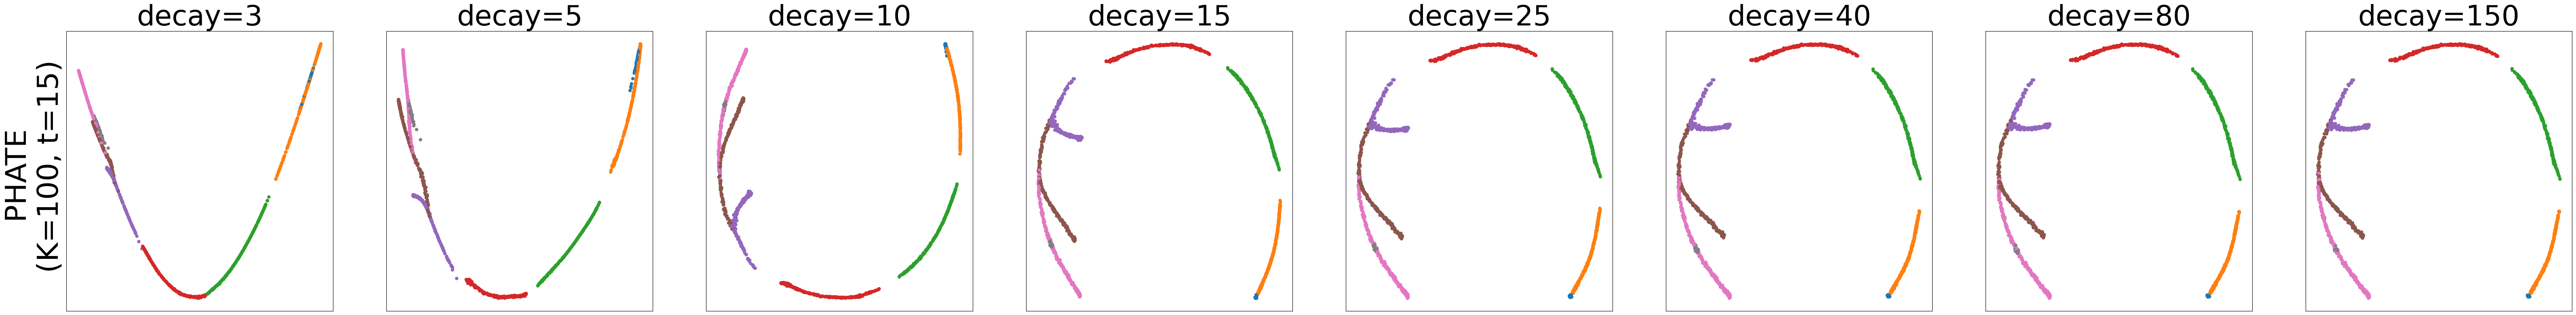

In [10]:
fig, ax = plt.subplots(ncols=len(Ds), nrows=1, figsize=(10*len(Ds), 9))

# Plot the embeddings for each method and subset size
for i, decay in enumerate(Ds):   
    if i == 0:
        scprep.plot.scatter2d(phate_embs_d[i], s=25, ax=ax[i], c=sim_label, cmap='tab10', 
                              xticks=False, yticks=False, legend=False, ylabel=f'PHATE \n (K={K}, t={t})', fontsize=36)
    else:
        scprep.plot.scatter2d(phate_embs_d[i], s=25, ax=ax[i], c=sim_label, cmap='tab10', 
                              xticks=False, yticks=False, legend=False, fontsize=36)

# Add labels for each row
for i, decay in enumerate(Ds):
    ax[i].set_title('decay={}'.format(decay), fontsize=50) 

plt.savefig(Figure_PATH+'/tree_phate_d.png', format='png', bbox_inches='tight', dpi=300)